In [2]:
import qiskit.providers
import matplotlib as plt
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram, plot_gate_map, plot_coupling_map

In [2]:
# Saving your IBM Quantum account in ~/.qiskit dir
# May remove after first execution
QiskitRuntimeService.save_account(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='2a726260cab70d724be7e208e75f5806e8b8c8d695fca3b1db9794d36d83258d44f7652fd23c5dbec5a47c1d42b80c00b3fd0b8abe7e33b61956e6d4ea81069f',
    overwrite=True,
    set_as_default = True
)
# Loading your account here
service = QiskitRuntimeService()

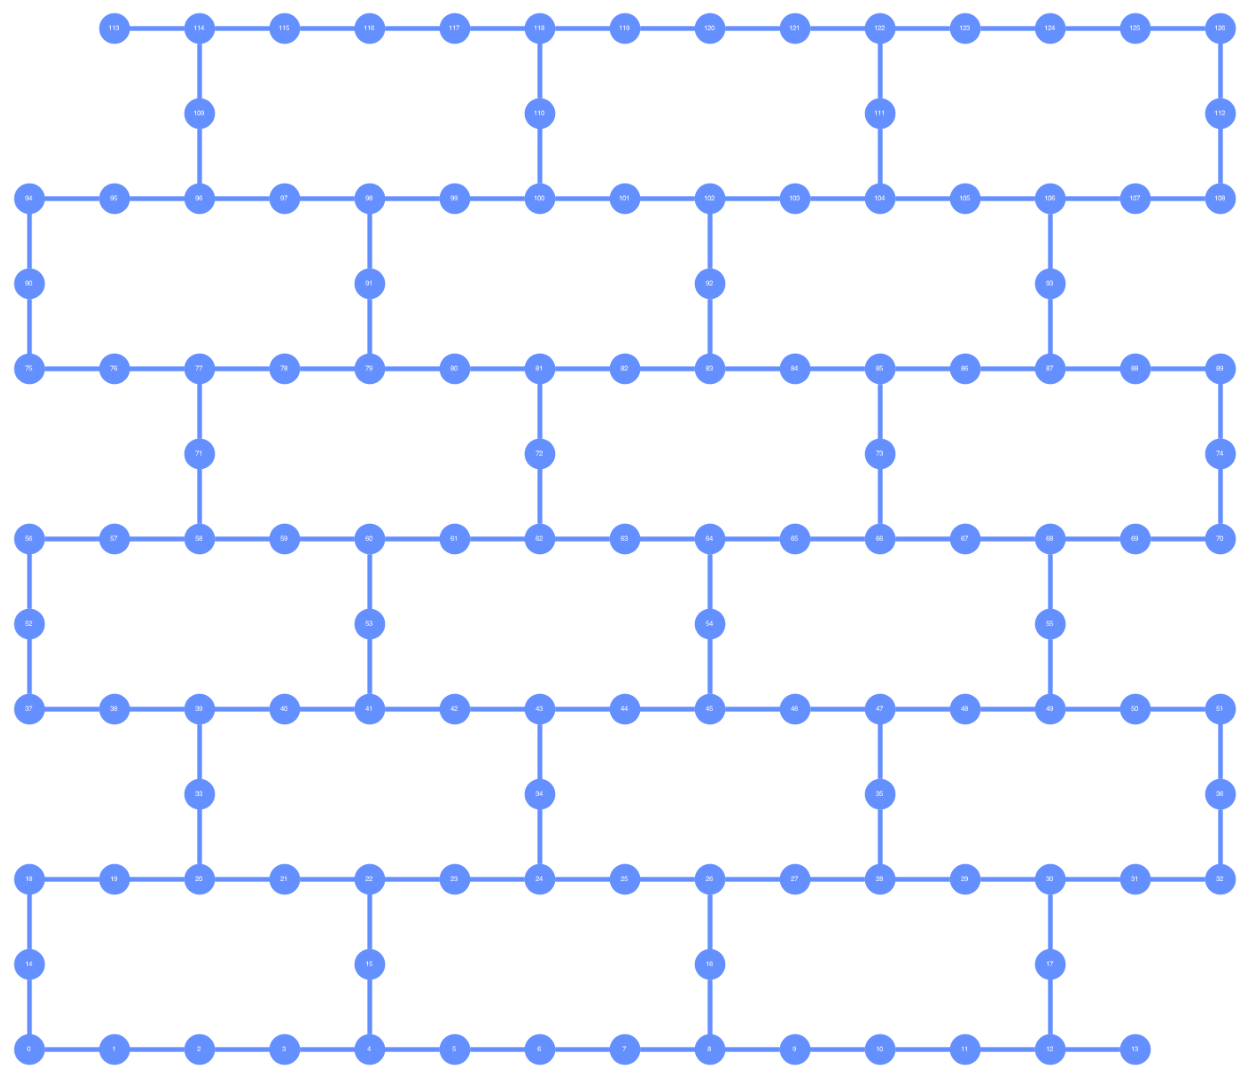

In [3]:
backend = service.backend('ibm_kyoto')
plot_gate_map(backend)

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='latex')

MissingOptionalLibraryError: "The 'pdflatex' library is required to use 'LaTeX circuit drawing'.  You will likely need to install a full LaTeX distribution for your system."

In [5]:
# run job on real hardware
job = backend.run(transpile(qc, backend=backend), shots=1024)

In [17]:
job.job_id()

'cqzted9s9z7g008dq6ng'

In [41]:
finished_job = backend.service.jobs()[0]

In [43]:
result = finished_job.result()

In [44]:
result

Result(backend_name='ibm_kyoto', backend_version='0.0.0', qobj_id='Unknown', job_id='Unknown', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x2': 99, '0x1': 79, '0x3': 442, '0x0': 404}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51], ['q', 52], ['q', 53], ['q', 54], ['q', 55], ['q', 56], ['q', 57], ['q', 58], ['q', 59], ['q', 60], ['q', 61], ['q', 62], ['q', 63], ['q', 6

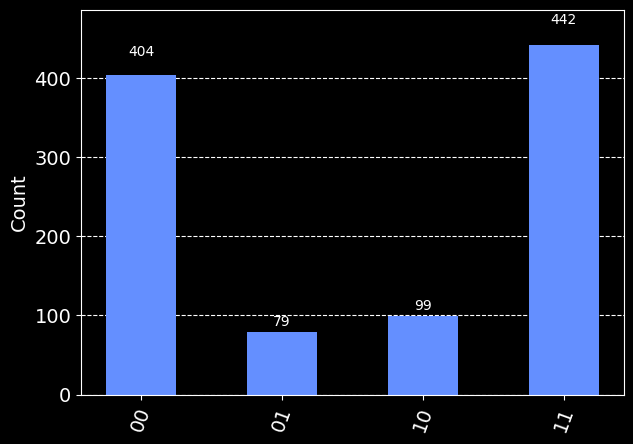

In [45]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plot_histogram(result.get_counts())